In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.data_generator import get_data, add_bucket_AQ10_Score
from src.stats import get_statistics_for_AQ10, get_statistics_for_selfID
from scipy.stats import pearsonr as perason_test

In [2]:
data = get_data()
print(data.columns)
data.head(5)

Index(['Participant_N', 'Age', 'Education', 'BUCKETED_Education', 'Gender',
       'Handedness', 'Self_ID', 'AQ10_Score', 'Hand_Cms', 'Arm_Cms',
       'selfIdentyfing', 'TextureScore', 'SizeScore', 'WeightScore',
       'SummedUpScore', 'FullGuessScore', 'PleasantnessSum'],
      dtype='object')


,Participant_N,Age,Education,BUCKETED_Education,Gender,Handedness,Self_ID,AQ10_Score,Hand_Cms,Arm_Cms,selfIdentyfing,TextureScore,SizeScore,WeightScore,SummedUpScore,FullGuessScore,PleasantnessSum
0,1,18,UG1,UG,male,right,6,4,18.0,72.0,noSpecialIlnesses,4,4,2,6,2,13.0
1,2,18,UG1,UG,female,right,6,5,17.0,63.5,noSpecialIlnesses,3,4,4,7,3,13.0
2,3,26,postGrad,gradNHigher,male,right,6,4,21.0,84.0,noSpecialIlnesses,4,4,2,6,2,13.0
3,4,23,postGrad,gradNHigher,male,right,6,3,19.0,71.5,noSpecialIlnesses,2,4,4,6,2,11.0
4,5,24,postGrad,gradNHigher,male,right,6,1,20.5,79.5,noSpecialIlnesses,3,4,4,7,3,13.0


In [3]:
print(perason_test(data.AQ10_Score, data.TextureScore))
print(perason_test(data.AQ10_Score, data.SizeScore))
print(perason_test(data.AQ10_Score, data.WeightScore))
print(perason_test(data.AQ10_Score, data.SummedUpScore))
print(perason_test(data.AQ10_Score, data.FullGuessScore))

PearsonRResult(statistic=0.10007278171258945, pvalue=0.5987807946459243)
PearsonRResult(statistic=nan, pvalue=nan)
PearsonRResult(statistic=0.07640937949081208, pvalue=0.6881876378793872)
PearsonRResult(statistic=0.12585999309606655, pvalue=0.5075133856303919)
PearsonRResult(statistic=0.17324861936289035, pvalue=0.3599026399070012)


/Users/szczekulskij/.pyenv/versions/3.10.9/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


## Let's start w. some graphs aye aye

,AQ10_Score,nr of people,mean TextureScore,mean WeightScore,mean FullGuessScore,mean SummedUpScore
0,0,1,2.000000,2.000000,1.000000,4.000000
1,1,3,2.000000,4.000000,2.000000,6.000000
2,2,1,1.000000,2.000000,0.000000,3.000000
3,3,9,3.333333,3.333333,2.777778,6.666667
4,4,9,3.000000,3.333333,2.333333,6.333333
5,5,4,3.250000,3.500000,3.000000,6.750000
6,6,2,0.500000,3.000000,0.500000,3.500000
7,7,1,4.000000,4.000000,4.000000,8.000000


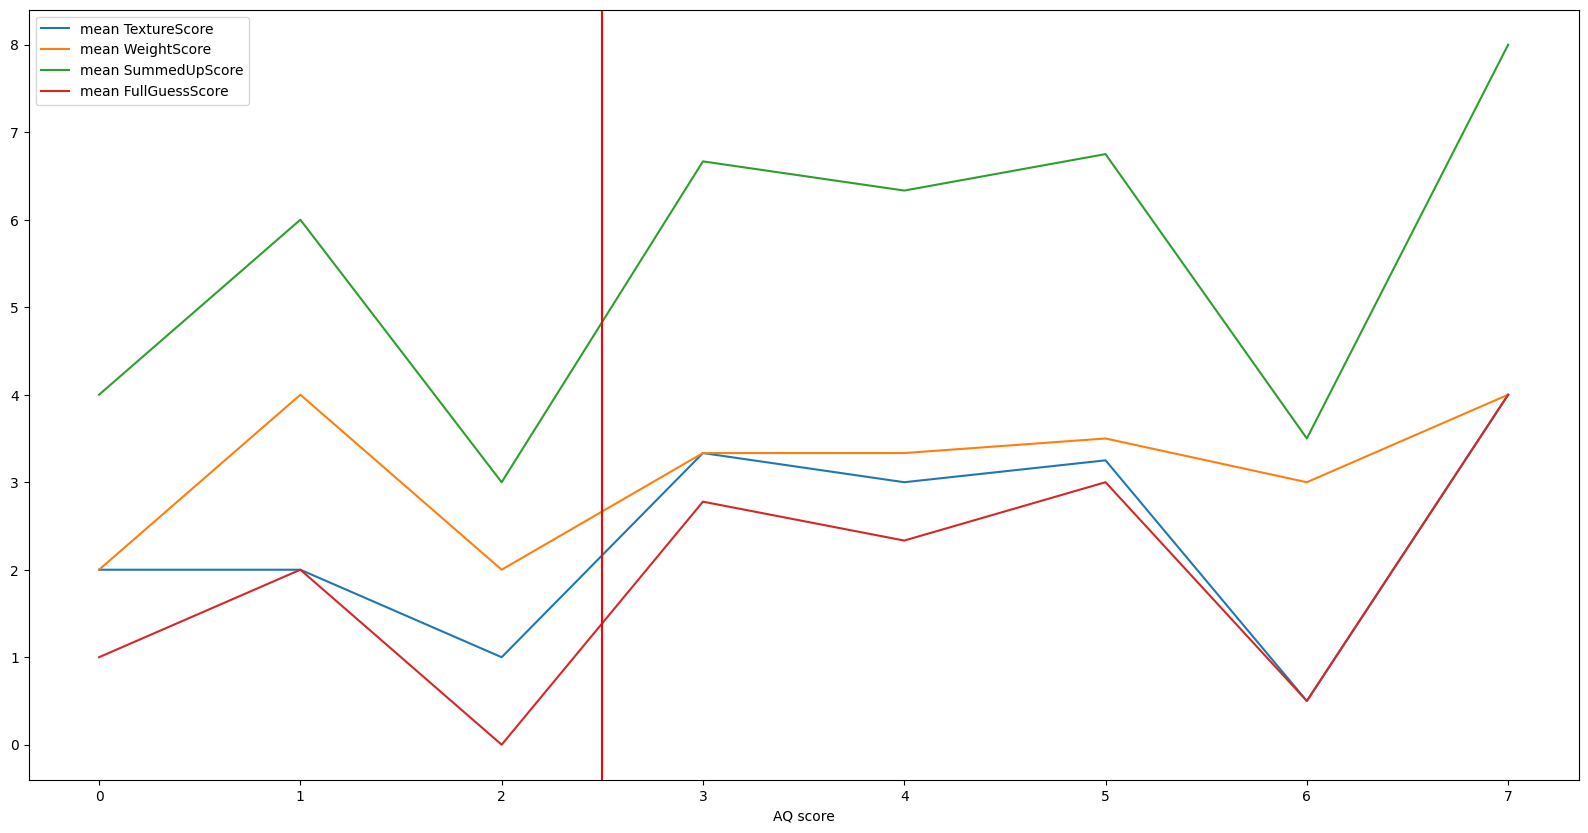

In [30]:
df = get_data()
df["nr of people"] = 1
df = df.groupby(by = "AQ10_Score", as_index=False).agg(
    {
        "TextureScore" : "mean",
        "WeightScore" : "mean",
        "SummedUpScore" : "mean",
        "FullGuessScore" : "mean",
        "nr of people" : "sum"
    }
)

plt.figure(figsize=(20,10))
plt.plot([i for i in range(8)], df.TextureScore, label = "mean TextureScore")
plt.plot([i for i in range(8)], df.WeightScore, label = "mean WeightScore")
plt.plot([i for i in range(8)], df.SummedUpScore, label = "mean SummedUpScore")
plt.plot([i for i in range(8)], df.FullGuessScore, label = "mean FullGuessScore")
plt.axvline(x=2.5, color='r', linestyle='-')
# plt.plot([i for i in range(8)], df["count"], label = "Count")
plt.xlabel("AQ score")
plt.legend()

df["mean TextureScore"] = df["TextureScore"]
df["mean WeightScore"] = df["WeightScore"]
df["mean FullGuessScore"] = df["FullGuessScore"]
df["mean SummedUpScore"] = df["SummedUpScore"]
df = df.drop(columns = ["TextureScore", "WeightScore", "FullGuessScore", "SummedUpScore"])
df

,Arm_Cms,TextureScore,WeightScore,SummedUpScore,FullGuessScore,count
0,63.5,3.0,4.0,7.0,3.0,1
1,66.3,4.0,4.0,8.0,4.0,1
2,68.5,0.0,2.0,2.0,0.0,1
3,69.0,3.0,4.0,7.0,3.0,2
4,70.0,3.5,4.0,7.5,3.5,2
5,71.0,3.0,3.0,6.0,2.5,2
6,71.5,2.0,4.0,6.0,2.0,2
7,72.0,2.5,2.0,4.5,1.0,2
8,72.5,3.0,3.0,6.0,2.0,2
9,73.0,2.0,4.0,6.0,2.0,1


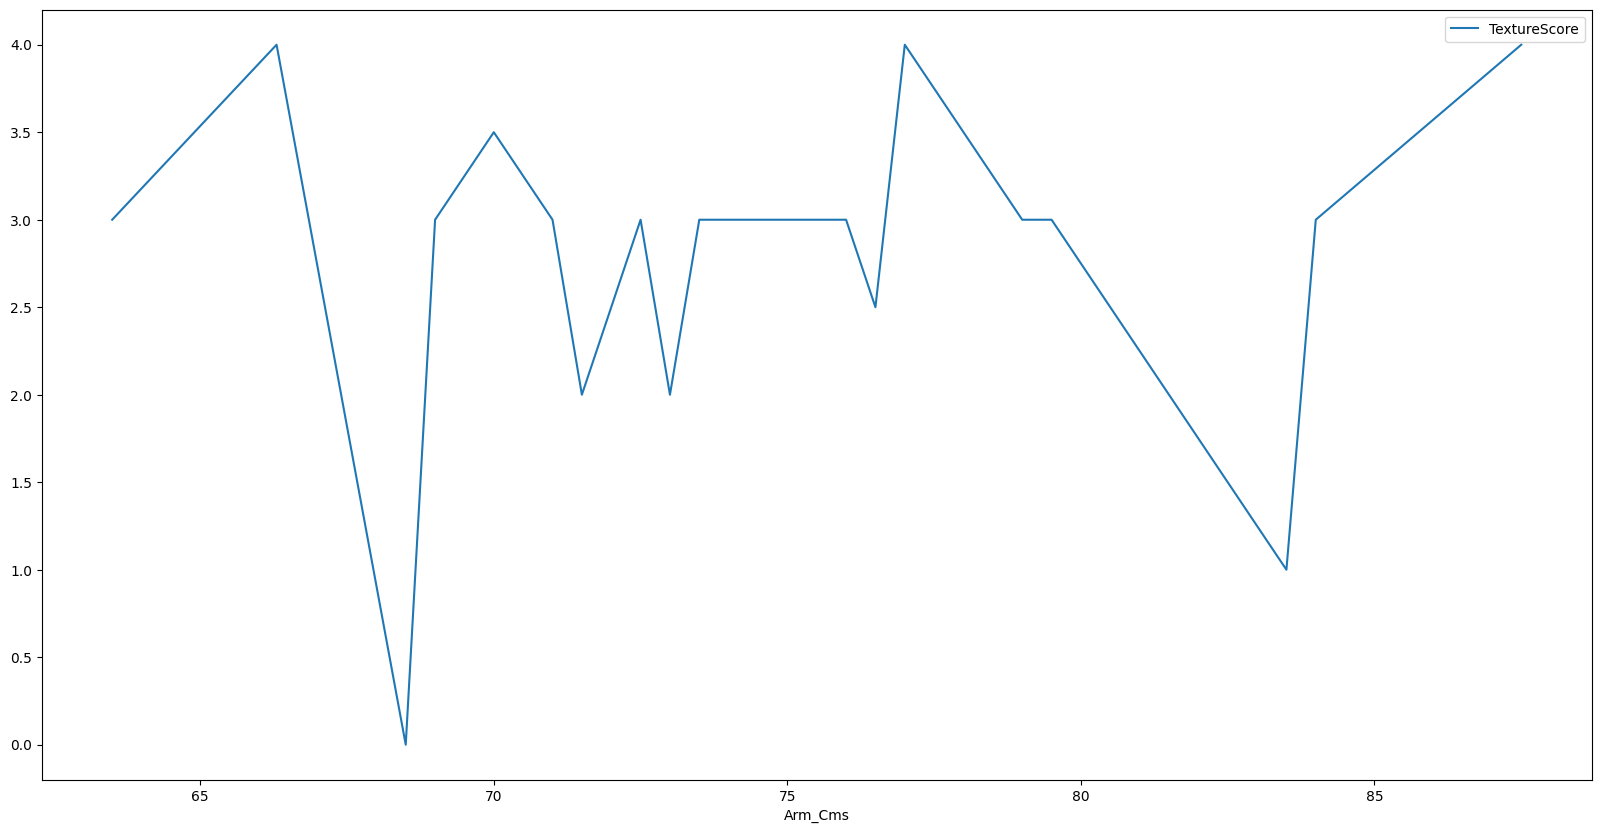

In [5]:
df = get_data()
df["count"] = 1
# Hand_Cms	Arm_Cms
df = df.groupby(by = "Arm_Cms", as_index=False).agg(
    {
        "TextureScore" : "mean",
        "WeightScore" : "mean",
        "SummedUpScore" : "mean",
        "FullGuessScore" : "mean",
        "count" : "sum"
    }
)

plt.figure(figsize=(20,10))
plt.plot(df.Arm_Cms, df.TextureScore, label = "TextureScore")
plt.xlabel("Arm_Cms")
plt.legend()

df

In [28]:
for inteval_list in [
    [0,1,10],
    [0,2,10],
    [0,3,10],
    [0,4,10],
    [0,5,10],

    [0,2,5,10],
    [0,2,7,10],

    [0,3,5,10],
    [0,3,7,10],

    [0,2,4,10],
    [0,4,5,10],
]:
    get_statistics_for_AQ10(inteval_list)

grouping_interval: [0, 1, 10]
columnName: TextureScore
len left: 4| len right: 26
mean left: 2| mean right: 2.92
p_value for alternative greater: 0.92
p_value for alternative less 0.08
-------------------------------
columnName: PleasantnessSum
len left: 4| len right: 26
mean left: 12.75| mean right: 12.42
p_value for alternative greater: 0.39
p_value for alternative less 0.61
-------------------------------
columnName: WeightScore
len left: 4| len right: 26
mean left: 3.5| mean right: 3.31
p_value for alternative greater: 0.36
p_value for alternative less 0.64
-------------------------------
columnName: SummedUpScore
len left: 4| len right: 26
mean left: 5.5| mean right: 6.23
p_value for alternative greater: 0.81
p_value for alternative less 0.19
-------------------------------
columnName: FullGuessScore
len left: 4| len right: 26
mean left: 1.75| mean right: 2.42
p_value for alternative greater: 0.85
p_value for alternative less 0.15
-------------------------------


grouping_interva

## Investigate pleaseatness

,AQ10_Score,nr of people,mean PleasantnessSum
0,0,1,10.000000
1,1,3,13.666667
2,2,1,15.000000
3,3,9,12.666667
4,4,9,12.111111
5,5,4,13.000000
6,6,2,10.000000
7,7,1,13.000000


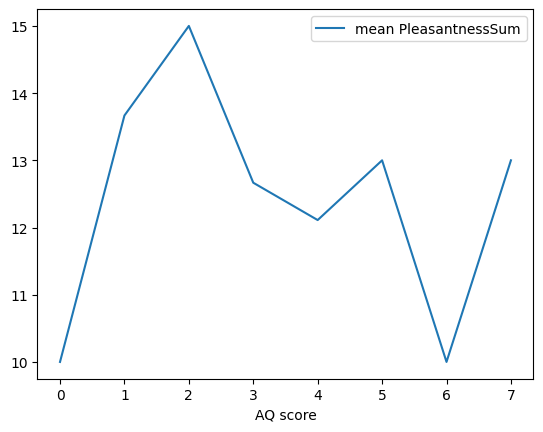

In [35]:
df = get_data()
df["nr of people"] = 1
df = df.groupby(by = "AQ10_Score", as_index=False).agg(
    {
        "PleasantnessSum" : "mean",
        "nr of people" : "sum"
    }
)

plt.plot(df.AQ10_Score, df.PleasantnessSum, label = "mean PleasantnessSum")
# plt.axvline(x=2.5, color='r', linestyle='-')
plt.xlabel("AQ score")
plt.legend()

df["mean PleasantnessSum"] = df["PleasantnessSum"]
df = df.drop(columns="PleasantnessSum")
df

## Finally - have a look if selfId influences results:

In [8]:
get_statistics_for_selfID()

columnName: TextureScore
len left: 24| len right: 6
mean left: 2.83| mean right: 2.67
p_value for alternative greater: 0.38
p_value for alternative less 0.62
-------------------------------
columnName: PleasantnessSum
len left: 24| len right: 6
mean left: 12.75| mean right: 11.33
p_value for alternative greater: 0.07
p_value for alternative less 0.93
-------------------------------
columnName: WeightScore
len left: 24| len right: 6
mean left: 3.25| mean right: 3.67
p_value for alternative greater: 0.82
p_value for alternative less 0.18
-------------------------------
columnName: SummedUpScore
len left: 24| len right: 6
mean left: 6.08| mean right: 6.33
p_value for alternative greater: 0.64
p_value for alternative less 0.36
-------------------------------
columnName: FullGuessScore
len left: 24| len right: 6
mean left: 2.29| mean right: 2.5
p_value for alternative greater: 0.65
p_value for alternative less 0.35
-------------------------------




<BarContainer object of 1 artists>

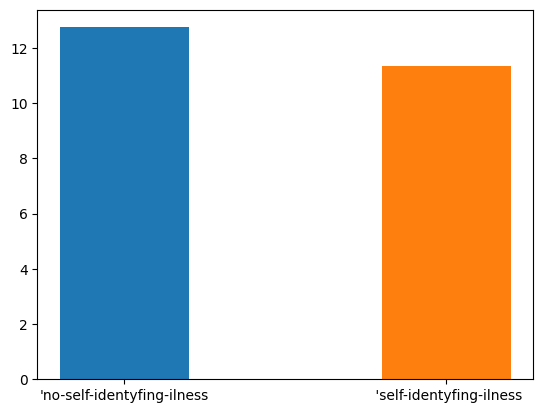

In [25]:
from statistics import mean


df = get_data()
subDFs = []
subDFs.append(df.loc[df["selfIdentyfing"] == "noSpecialIlnesses"])
subDFs.append(df.loc[df["selfIdentyfing"] == "SpecialIlness"])
subList = []
for subDf in subDFs:
    subList.append(list(subDf["PleasantnessSum"]))

left = subList[0]
right = subList[1]

plt.bar("'no-self-identyfing-ilness", mean(subList[0]), 0.4)
plt.bar(" 'self-identyfing-ilness", mean(subList[1]), 0.4)

# plt.scatter([1 for i in range(len(subList[0]))], subList[0])
# plt.scatter([2 for i in range(len(subList[1]))], subList[1])